Resources:
* https://stackoverflow.com/questions/1730600/principal-component-analysis-in-python?rq=1
* http://sebastianraschka.com/Articles/2014_pca_step_by_step.html#using-the-pca-class-from-the-matplotlibmlab-library
* http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html#explained-variance
* https://www.riskprep.com/all-tutorials/36-exam-22/132-understanding-principal-component-analysis-pca
* https://github.com/scikit-learn/scikit-learn/blob/14031f6/sklearn/decomposition/pca.py#L325
* https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca?rq=1

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
import glob, os
path = '/Users/evrial/Downloads/price_csv/'
all_files = glob.glob(os.path.join(path, "*.csv"))
len(all_files)

40

In [3]:
df_from_each_file = []
for path in all_files:
    fname = os.path.splitext(os.path.basename(path))[0]
    ticker, category = fname.strip('yahooBars_').split('_')
    df = pd.read_csv(path)
    df['Ticker'] = ticker
    df['Category'] = category
    df_from_each_file.append(df)

df = pd.concat(df_from_each_file, ignore_index=True)

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Ticker,Category
0,2006-01-03,52.290001,53.180000,52.230000,53.119999,4606500,53.119999,GLD,2
1,2006-01-04,52.869999,53.340000,52.619999,53.299999,5287900,53.299999,GLD,2
2,2006-01-05,52.560001,52.720001,52.099998,52.340000,7661800,52.340000,GLD,2
3,2006-01-06,53.139999,53.869999,53.040001,53.720001,4629800,53.720001,GLD,2
4,2006-01-09,53.459999,54.990002,53.310001,54.599998,5394200,54.599998,GLD,2


In [5]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,106916.000000,106916.000000,106916.000000,106916.000000,1.069160e+05,106916.000000
mean,66.723637,67.181086,66.205203,66.721654,1.367801e+07,60.528935
std,39.089334,39.263528,38.884783,39.090698,3.839279e+07,41.111293
min,5.030000,5.110000,4.980000,5.030000,0.000000e+00,5.401436
25%,36.650002,36.939999,36.317500,36.650002,4.911000e+05,30.895934
50%,59.029999,59.430000,58.540001,59.029999,2.412150e+06,51.468541
75%,87.980003,88.562498,87.250000,87.959999,8.774925e+06,77.898359
max,273.000000,273.330002,268.110008,271.070000,8.710263e+08,507.839996


In [6]:
df.cov()

,Open,High,Low,Close,Volume,Adj Close
Open,1.527976e+03,1.534634e+03,1.519696e+03,1.527717e+03,1.322321e+08,1.280187e+03
High,1.534634e+03,1.541625e+03,1.526338e+03,1.534652e+03,1.352664e+08,1.285161e+03
Low,1.519696e+03,1.526338e+03,1.512026e+03,1.519785e+03,1.284924e+08,1.274707e+03
Close,1.527717e+03,1.534652e+03,1.519785e+03,1.528083e+03,1.317067e+08,1.280631e+03
Volume,1.322321e+08,1.352664e+08,1.284924e+08,1.317067e+08,1.474006e+15,1.127808e+08
Adj Close,1.280187e+03,1.285161e+03,1.274707e+03,1.280631e+03,1.127808e+08,1.690138e+03


In [7]:
df.corr()

,Open,High,Low,Close,Volume,Adj Close
Open,1.000000,0.999901,0.999813,0.999796,0.088111,0.796625
High,0.999901,1.000000,0.999727,0.999878,0.089733,0.796173
Low,0.999813,0.999727,1.000000,0.999836,0.086069,0.797388
Close,0.999796,0.999878,0.999836,1.000000,0.087758,0.796874
Volume,0.088111,0.089733,0.086069,0.087758,1.000000,0.071454
Adj Close,0.796625,0.796173,0.797388,0.796874,0.071454,1.000000


In [8]:
corr = df.corr()
cov = df.cov()

corr.sum()

Open         4.884246
High         4.885412
Low          4.882834
Close        4.884141
Volume       1.423124
Adj Close    4.258513
dtype: float64

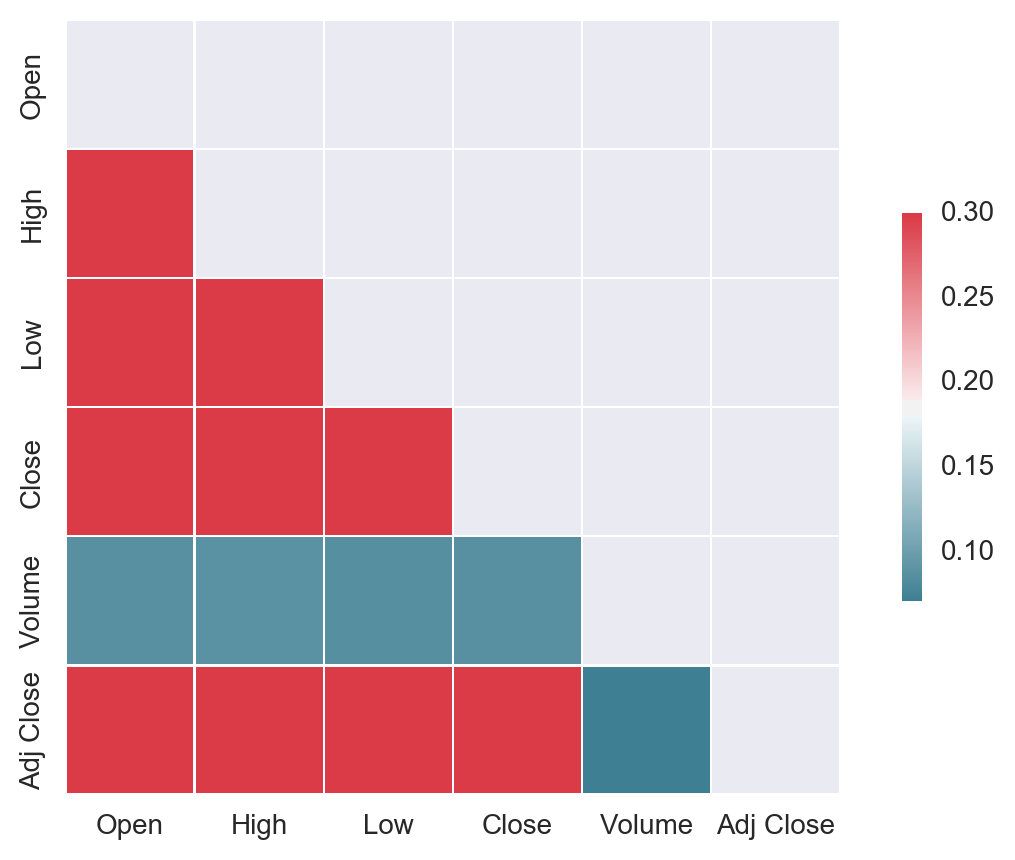

In [9]:
# http://seaborn.pydata.org/examples/many_pairwise_correlations.html

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);

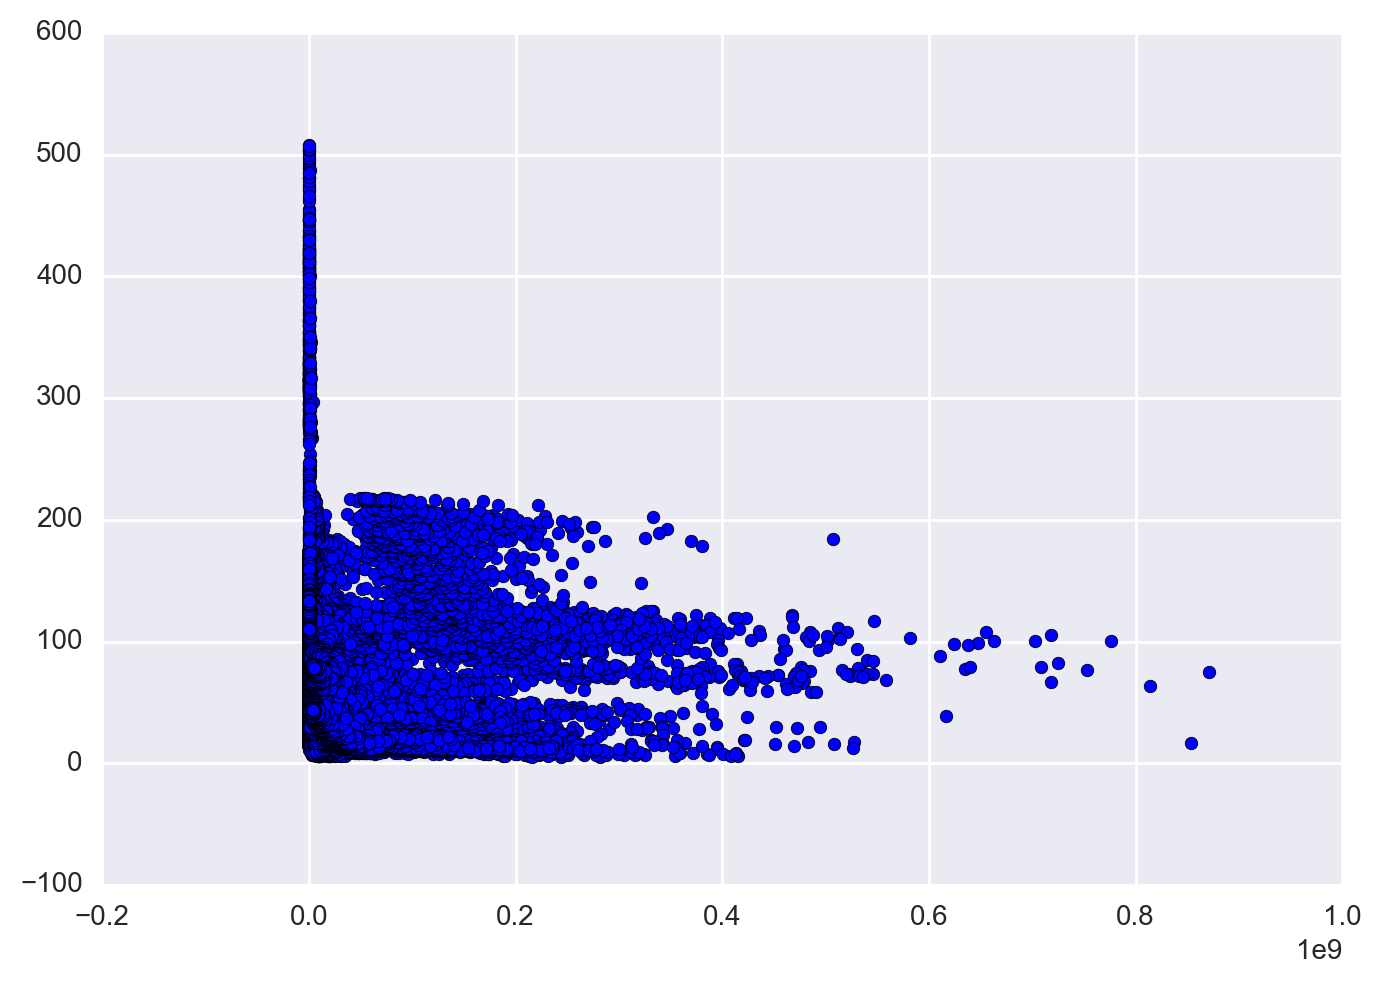

In [28]:
plt.scatter(df['Volume'], df['Adj Close'])

In [10]:
X = df.drop(['Date', 'Ticker', 'Category'], axis=1).as_matrix()
X.shape

(106916, 6)

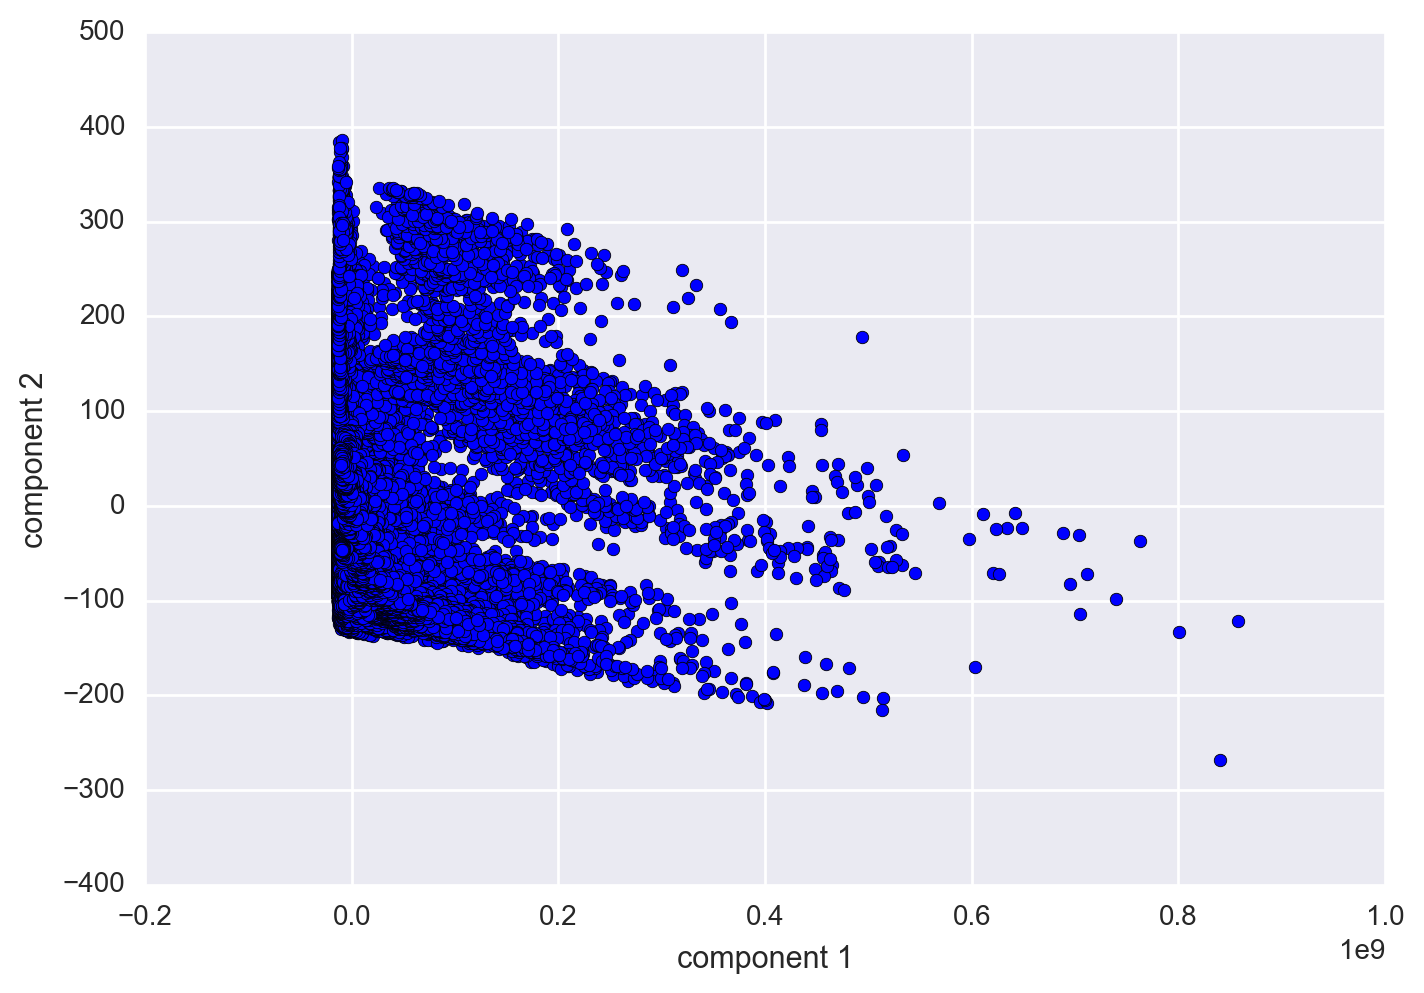

In [11]:
from sklearn.decomposition import PCA as sklPCA  # 1. Choose the model class
pca = sklPCA(n_components=2)            # 2. Instantiate the model with hyperparameters
pca.fit(X)                      # 3. Fit to data. Notice y is not specified!
X_2D = pca.transform(X)         # 4. Transform the data to two dimensions

plt.scatter(X_2D[:, 0], X_2D[:, 1])
plt.xlabel('component 1')
plt.ylabel('component 2');

Covariance matrix: 
[[ 1.          0.99990138  0.99981296  0.9997957   0.0881108   0.79662521]
 [ 0.99990138  1.          0.99972741  0.9998782   0.08973276  0.79617254]
 [ 0.99981296  0.99972741  1.          0.99983633  0.08606928  0.79738761]
 [ 0.9997957   0.9998782   0.99983633  1.          0.08775762  0.79687359]
 [ 0.0881108   0.08973276  0.08606928  0.08775762  1.          0.07145363]
 [ 0.79662521  0.79617254  0.79738761  0.79687359  0.07145363  1.        ]]
Eigenvalues:
 [  4.69775103e+00   9.90294865e-01   3.11439137e-01   2.79322442e-04
   1.97966894e-04   3.76801759e-05]
Eigenvectors:
 [[  4.58387001e-01   2.21124196e-02   1.98867597e-01  -2.89430606e-01
    6.38396637e-01   5.08452294e-01]
 [  4.58366232e-01   2.04645211e-02   2.00168737e-01  -5.72758318e-01
   -1.48586189e-01  -6.31889334e-01]
 [  4.58416001e-01   2.41888751e-02   1.96573439e-01   7.59820166e-01
    2.29746508e-01  -3.47157613e-01]
 [  4.58404109e-01   2.24752547e-02   1.98141907e-01   1.04109489e-01
   -

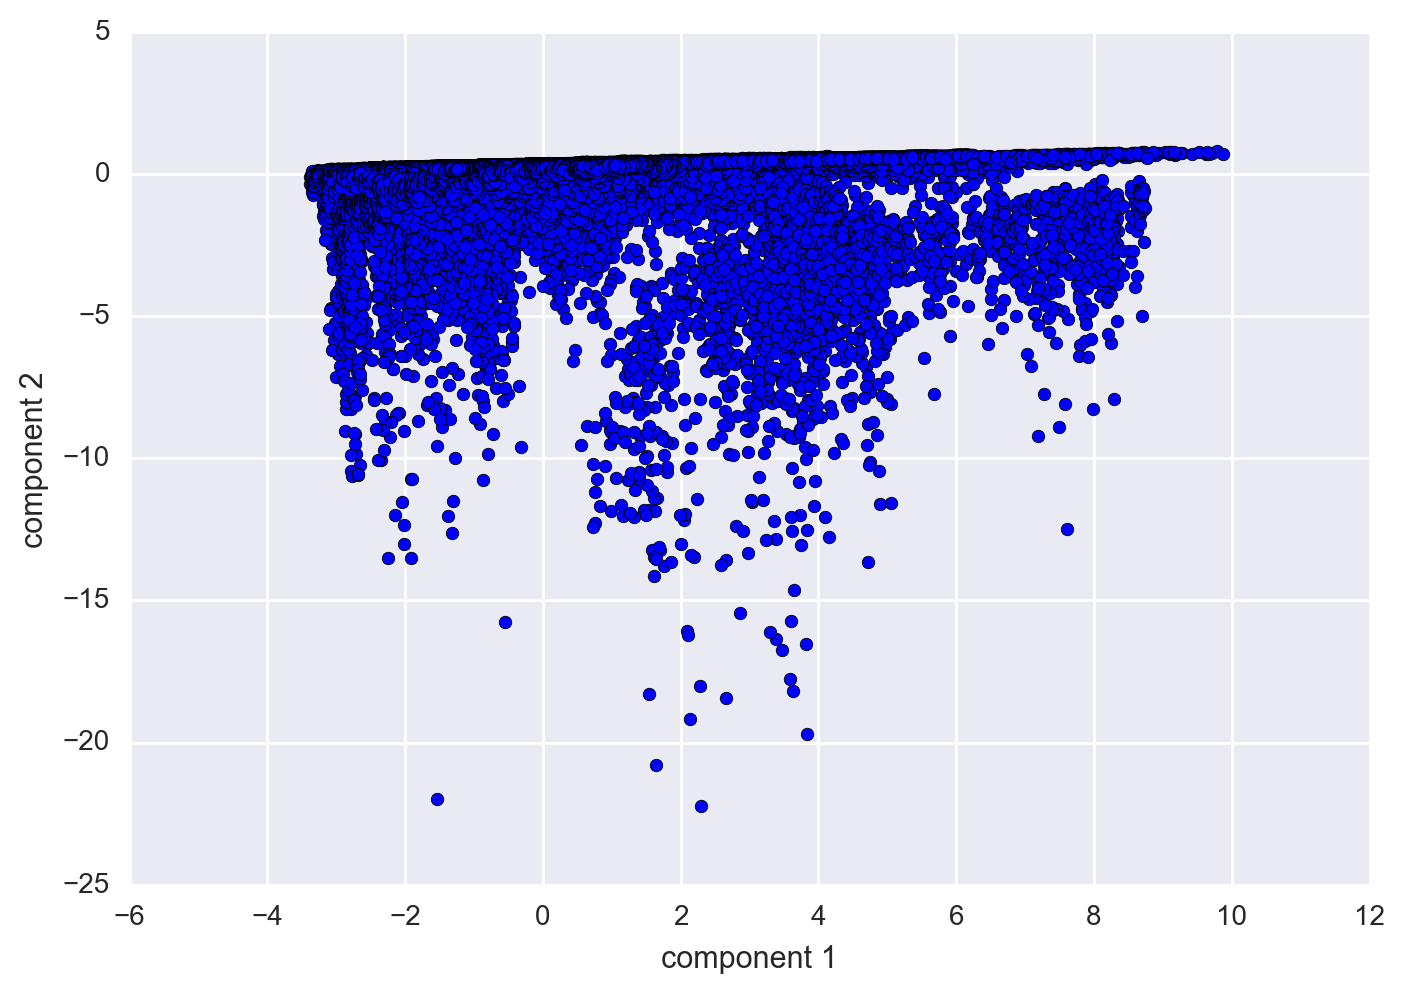

In [12]:
from pca import PCA, flip_signs

model = PCA()
projected = model.eigen(X)

plt.scatter(projected[:, 0], projected[:, 1])
plt.xlabel('component 1')
plt.ylabel('component 2');

In [13]:
svd_projected = model.svd(X)
projected, svd_projected = flip_signs(projected, svd_projected)

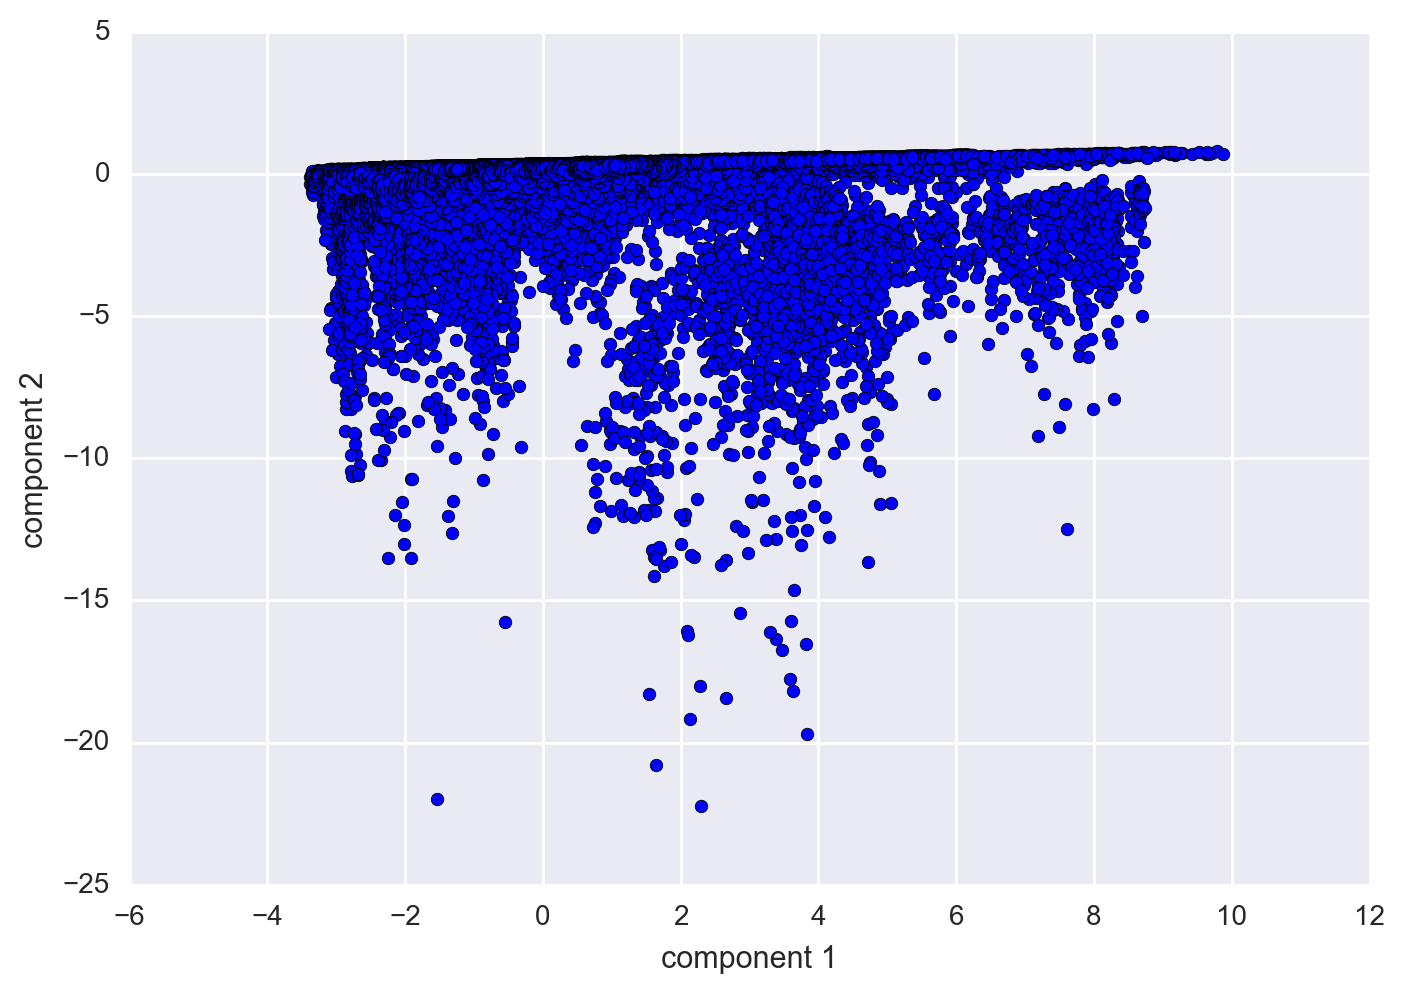

In [14]:
plt.scatter(svd_projected[:, 0], svd_projected[:, 1])
plt.xlabel('component 1')
plt.ylabel('component 2');

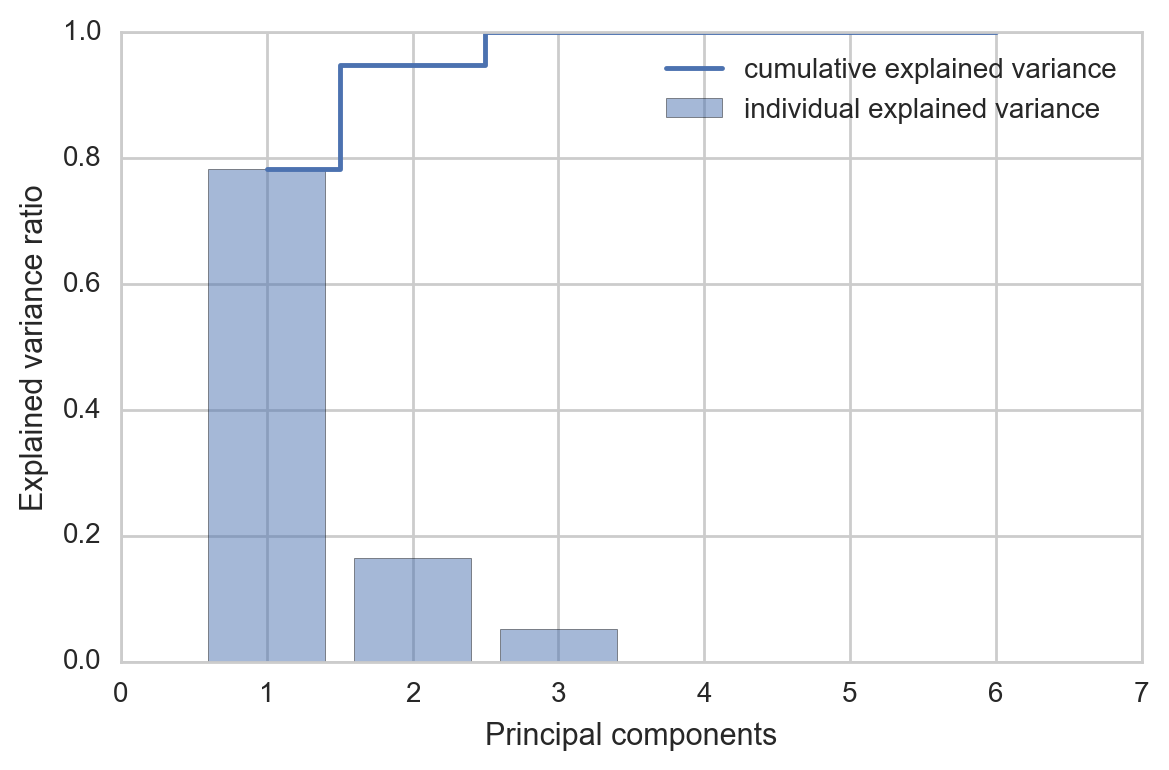

In [15]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(left=np.arange(model.n_components_) + 1,
            height=model.explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(x=np.arange(model.n_components_) + 1,
             y=model.explained_variance_cumsum, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [16]:
projected[42]

array([ -5.75610768e-01,   1.86121295e-01,  -1.02659231e-01,
        -1.76659403e-02,   1.71512285e-02,   4.74077098e-04])

In [17]:
svd_projected[42]

array([ -5.75610768e-01,   1.86121295e-01,  -1.02659231e-01,
        -1.76659403e-02,   1.71512285e-02,   4.74077098e-04])

In [18]:
np.testing.assert_allclose(projected, svd_projected, rtol=1e-04)

In [21]:
global_principal_component = PCA(n_components=1).svd(X)

In [22]:
global_principal_component.shape

(106916, 1)

Category 1 (37626, 6)
Category 2 (20808, 6)
Category 3 (16176, 6)
Category 4 (24264, 6)
Category 5 (8042, 6)


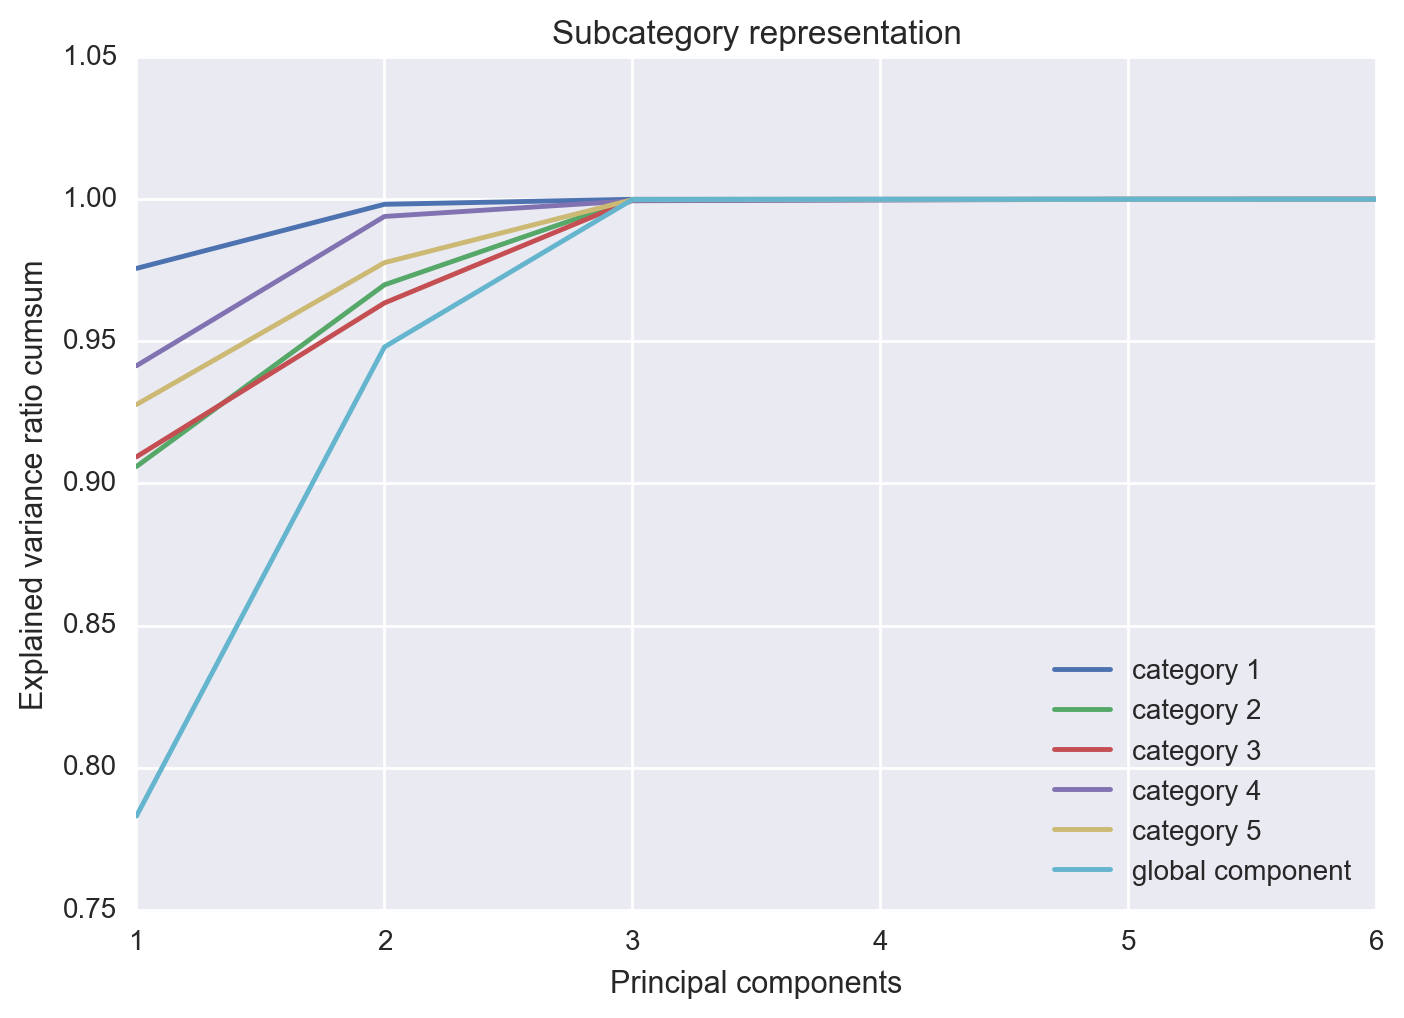

In [23]:
# SVD method
for category in range(1, 6):
    df_sub = df[df['Category'] == str(category)]
    df_sub = df_sub.drop(['Date', 'Ticker', 'Category'], axis=1)

    print('Category %i' % category, df_sub.shape)

    
    X_norm = model.scale(df_sub).as_matrix()
    
    # substract column vector using numpy broadcasting
    residuals = X_norm - global_principal_component[df_sub.index.values]
    
    sub_model = PCA()
    sub_pca = sub_model.svd(residuals)
    

    plt.plot(np.arange(sub_model.n_components_) + 1,
            sub_model.explained_variance_cumsum, 
            label='category %i' % category)
    plt.ylabel('Explained variance ratio cumsum')
    plt.xlabel('Principal components')
    plt.title('Subcategory representation')
    
plt.plot(np.arange(model.n_components_) + 1, model.explained_variance_cumsum, label='global component')
plt.legend(loc='best');


----------
Category 1 (37626, 6)
----------

Covariance matrix: 
[[ 1.          0.99997457  0.99994015  0.9999455   0.91742595  0.99336548]
 [ 0.99997457  1.          0.99991267  0.99996667  0.91798109  0.99332852]
 [ 0.99994015  0.99991267  1.          0.9999448   0.91673492  0.99342442]
 [ 0.9999455   0.99996667  0.9999448   1.          0.91731783  0.99342731]
 [ 0.91742595  0.91798109  0.91673492  0.91731783  1.          0.9116275 ]
 [ 0.99336548  0.99332852  0.99342442  0.99342731  0.9116275   1.        ]]
Eigenvalues:
 [  5.85401111e+00   1.35322824e-01   1.05137286e-02   8.83544916e-05
   5.37041248e-05   1.02754125e-05]
Eigenvectors:
 [[  4.12375032e-01   1.70482048e-01   2.27368754e-01   2.34664587e-01
   -6.49307241e-01  -5.22033325e-01]
 [  4.12408871e-01   1.66642781e-01   2.29695906e-01   5.44036224e-01
    4.24309698e-02   6.72021649e-01]
 [  4.12328855e-01   1.75192070e-01   2.21816564e-01  -8.05140547e-01
   -1.37119249e-01   2.88161547e-01]
 [  4.12371959e-01   1.71299

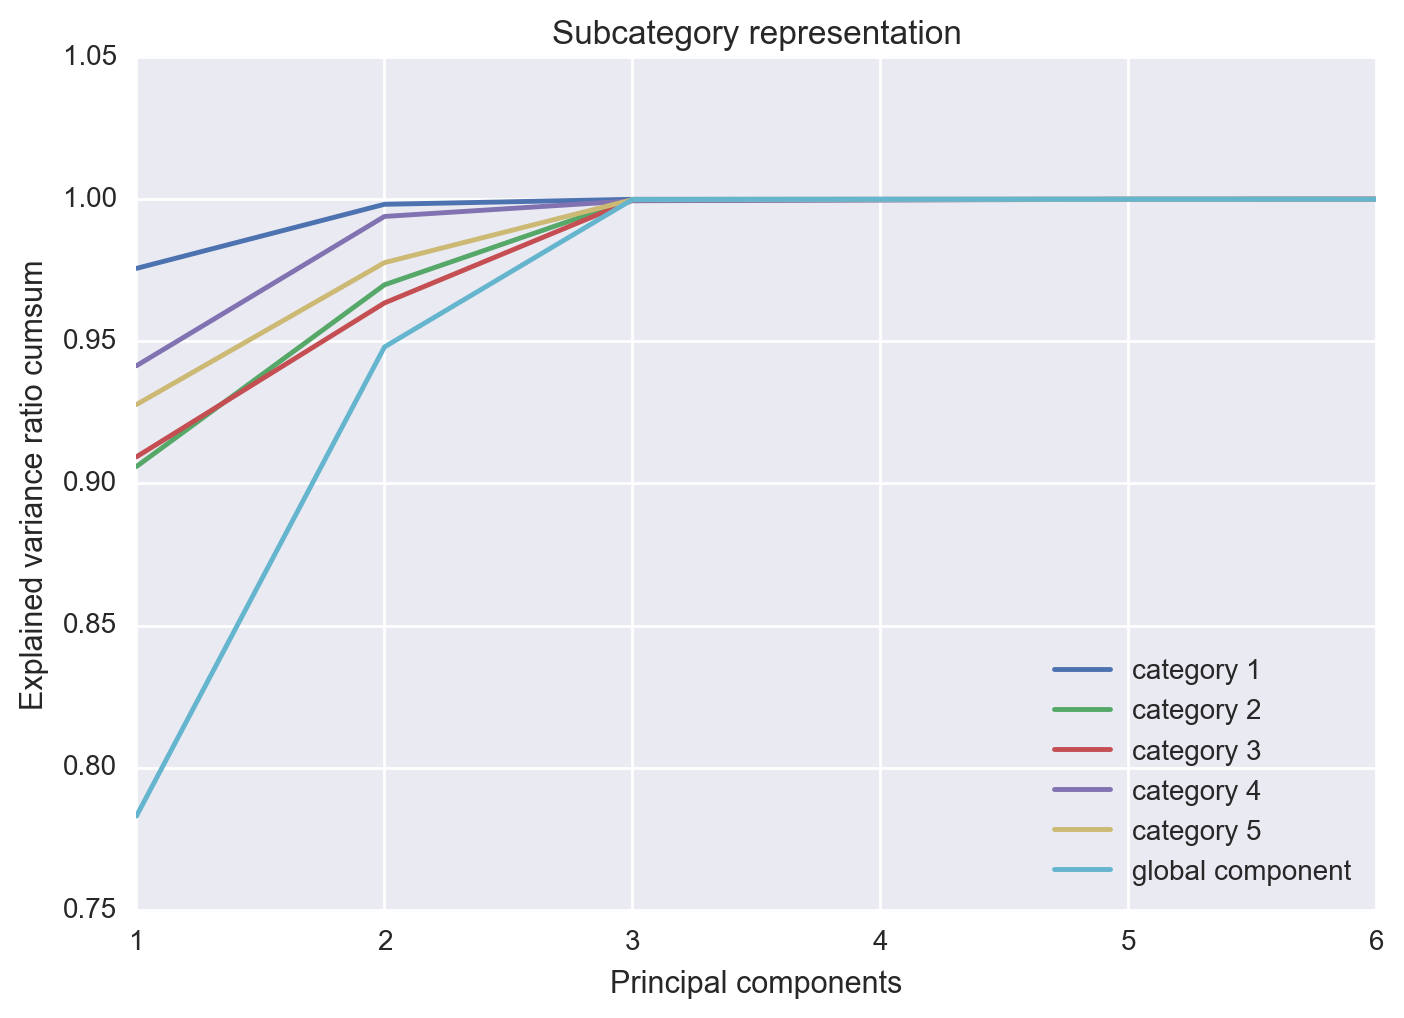

In [24]:
# same with eigenvectors, verbose
for category in range(1, 6):
    df_sub = df[df['Category'] == str(category)]
    df_sub = df_sub.drop(['Date', 'Ticker', 'Category'], axis=1)
    print('\n----------')
    print('Category %i' % category, df_sub.shape)
    print('----------\n')
    
    X_norm = model.scale(df_sub).as_matrix()
    
    # substract column vector using numpy broadcasting
    residuals = X_norm - global_principal_component[df_sub.index.values]
    
    sub_model = PCA()
    sub_pca = sub_model.eigen(residuals)

    plt.plot(np.arange(sub_model.n_components_) + 1,
            sub_model.explained_variance_cumsum, 
            label='category %i' % category)
    plt.ylabel('Explained variance ratio cumsum')
    plt.xlabel('Principal components')
    plt.title('Subcategory representation')
    
plt.plot(np.arange(model.n_components_) + 1, model.explained_variance_cumsum, label='global component')
plt.legend(loc='best');